### **Decision Tree using Python**

In [253]:
import pandas as pd

df = pd.DataFrame({"toothed":["True","True","True","False","True","True","True","True","True","False"],
                     "hair":["True","True","False","True","True","True","False","False","True","False"],
                     "breathes":["True","True","True","True","True","True","False","True","True","True"],
                     "legs":["True","True","False","True","True","True","False","False","True","True"],
                     "species":["Mammal","Mammal","Reptile","Mammal","Mammal","Mammal","Reptile","Reptile","Mammal","Reptile"]}, 
                    columns=["toothed","hair","breathes","legs","species"])

# features = df[["toothed","hair","breathes","legs"]]
# target = df["species"]

df

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


In [254]:
df.shape

(10, 5)

### **Data Visualization and Analysis**

In [255]:
df.isna().sum().sum()

0

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   toothed   10 non-null     object
 1   hair      10 non-null     object
 2   breathes  10 non-null     object
 3   legs      10 non-null     object
 4   species   10 non-null     object
dtypes: object(5)
memory usage: 528.0+ bytes


In [257]:
df.describe()

,toothed,hair,breathes,legs,species
count,10,10,10,10,10
unique,2,2,2,2,2
top,True,True,True,True,Mammal
freq,8,6,9,7,6


In [258]:
df['toothed'].value_counts()

True     8
False    2
Name: toothed, dtype: int64

In [259]:
df['hair'].value_counts()

True     6
False    4
Name: hair, dtype: int64

In [260]:
df['breathes'].value_counts()

True     9
False    1
Name: breathes, dtype: int64

In [261]:
df['legs'].value_counts()

True     7
False    3
Name: legs, dtype: int64

In [262]:
df['species'].value_counts()

Mammal     6
Reptile    4
Name: species, dtype: int64

In [263]:
# iloc = ilocation

X = df.iloc[:, :4]
X.head()

,toothed,hair,breathes,legs
0,True,True,True,True
1,True,True,True,True
2,True,False,True,False
3,False,True,True,True
4,True,True,True,True


In [264]:
Y = df.iloc[:, -1]
Y.head()

0     Mammal
1     Mammal
2    Reptile
3     Mammal
4     Mammal
Name: species, dtype: object

In [265]:
Y.value_counts()

Mammal     6
Reptile    4
Name: species, dtype: int64

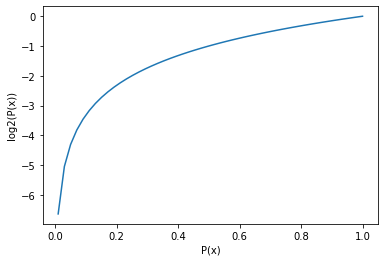

In [266]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log2(P(x))")

plt.show()

### **Train Test Split**

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, 
                                                    test_size = 0.4, 
                                                    random_state = 1 )

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6, 4)
(6,)
(4, 4)
(4,)


### **GadId3Classifier**

In [268]:
import numpy as np

class GadId3Classifier:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)

    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

### **Training, Prediction and Accuracy**

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# initialize and fit model
model = GadId3Classifier()
model.fit(X_train, y_train)

# return accuracy score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

### **Entropy of Species**

Entropy(species) = – p(Mammal) . log2p(Mammal) – p(Reptile) . log2p(Reptile)

In [270]:
total_species = df['species'].count()
total_species

10

In [271]:
df['species'].value_counts()

Mammal     6
Reptile    4
Name: species, dtype: int64

In [272]:
Entropy_species = - (6/total_species) * np.log2(6/total_species) - (4/total_species) * np.log2(4/total_species)
print("Entropy_species :", Entropy_species)

Entropy_species : 0.9709505944546686


### **Information Gain for toothed**

In [273]:
df[df['toothed'] == "True"]

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal


In [274]:
Entropy_species_toothed_True = - (5/8) * np.log2(5/8) - (3/8) * np.log2(3/8)
print("Entropy_species_toothed_True :", Entropy_species_toothed_True)

Entropy_species_toothed_True : 0.9544340029249649


In [275]:
df[df['toothed'] == "False"]

,toothed,hair,breathes,legs,species
3,False,True,True,True,Mammal
9,False,False,True,True,Reptile


In [276]:
Entropy_species_toothed_False = - (1/2) * np.log2(1/2) - (1/2) * np.log2(1/2)
print("Entropy_species_toothed_False :", Entropy_species_toothed_False)

Entropy_species_toothed_False : 1.0


In [277]:
#E(species, toothed) = (8/10) * E(5,3) + (2/10) * E(1,1)
#IG(species, toothed) = Entropy_species - E(species)

Entropy_species_toothed = (.8) * Entropy_species_toothed_True + (.2) * Entropy_species_toothed_False
Entropy_species_toothed

0.963547202339972

In [278]:
IGain_species_toothed = Entropy_species - Entropy_species_toothed 
IGain_species_toothed

0.007403392114696539

### **Information Gain for hair**

In [279]:
df[df['hair'] == "True"]

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
8,True,True,True,True,Mammal


In [280]:
Entropy_species_hair_True = - (6/6) * np.log2(6/6) - (0/6) * np.log2(0/6)
print("Entropy_species_hair_True :", Entropy_species_hair_True)

Entropy_species_hair_True : nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [281]:
df[df['hair'] == "False"]

,toothed,hair,breathes,legs,species
2,True,False,True,False,Reptile
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile
9,False,False,True,True,Reptile


In [282]:
Entropy_species_hair_False = - (0/4) * np.log2(0/4) - (4/4) * np.log2(4/4)
print("Entropy_species_hair_False :", Entropy_species_hair_False)

Entropy_species_hair_False : nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [283]:
Entropy_species_hair = 0 + 0
Entropy_species_hair

0

In [284]:
IGain_species_hair = Entropy_species - Entropy_species_hair
IGain_species_hair

0.9709505944546686

### **Information Gain for breathes**

In [285]:
df[df['breathes'] == "True"]

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
7,True,False,True,False,Reptile
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


In [286]:
Entropy_species_breathes_True = - (6/9) * np.log2(6/9) - (3/9) * np.log2(3/9)
print("Entropy_species_breathes_True :", Entropy_species_breathes_True)

Entropy_species_breathes_True : 0.9182958340544896


In [287]:
df[df['breathes'] == "False"]

,toothed,hair,breathes,legs,species
6,True,False,False,False,Reptile


In [288]:
Entropy_species_breathes_False = - (0/1) * np.log2(0/1) - (1/1) * np.log2(1/1)
print("Entropy_species_breathes_False :", Entropy_species_breathes_False)

Entropy_species_breathes_False : nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [289]:
Entropy_species_breathes = (.9) * Entropy_species_breathes_True + (.1) * 0
Entropy_species_breathes

0.8264662506490407

In [290]:
IGain_species_breathes = Entropy_species - Entropy_species_breathes 
IGain_species_breathes

0.1444843438056279

### **Information Gain for legs**

In [291]:
df[df['legs'] == "True"]

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal
5,True,True,True,True,Mammal
8,True,True,True,True,Mammal
9,False,False,True,True,Reptile


In [292]:
Entropy_species_legs_True = - (6/7) * np.log2(6/7) - (1/7) * np.log2(1/7)
print("Entropy_species_legs_True :", Entropy_species_legs_True)

Entropy_species_legs_True : 0.5916727785823275


In [293]:
df[df['legs'] == "False"]

,toothed,hair,breathes,legs,species
2,True,False,True,False,Reptile
6,True,False,False,False,Reptile
7,True,False,True,False,Reptile


In [294]:
Entropy_species_legs_False = - (0/3) * np.log2(0/3) - (1/3) * np.log2(1/3)
print("Entropy_species_legs_False :", Entropy_species_legs_False)

Entropy_species_legs_False : nan


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.


In [295]:
Entropy_species_legs = (.7) * Entropy_species_legs_True
Entropy_species_legs

0.4141709450076292

In [296]:
IGain_species_legs = Entropy_species - Entropy_species_legs 
IGain_species_legs

0.5567796494470394

### **Result:**

Conclusion - Hair is winner & thus becomes root of the tree.

Hence, Hair -> true = mammal and false = reptile.

The Hair feature is done.

### **Further working for the remaining features**

The root node is legs here because it has the max IG from toothed and breathes

In [297]:
df.head()

,toothed,hair,breathes,legs,species
0,True,True,True,True,Mammal
1,True,True,True,True,Mammal
2,True,False,True,False,Reptile
3,False,True,True,True,Mammal
4,True,True,True,True,Mammal


In [298]:
df_new = df.drop(columns = ['hair'])

In [299]:
df_new

,toothed,breathes,legs,species
0,True,True,True,Mammal
1,True,True,True,Mammal
2,True,True,False,Reptile
3,False,True,True,Mammal
4,True,True,True,Mammal
5,True,True,True,Mammal
6,True,False,False,Reptile
7,True,True,False,Reptile
8,True,True,True,Mammal
9,False,True,True,Reptile


In [300]:
df_new_legs =  df_new[df_new['legs'] == "True"]
df_new_legs

,toothed,breathes,legs,species
0,True,True,True,Mammal
1,True,True,True,Mammal
3,False,True,True,Mammal
4,True,True,True,Mammal
5,True,True,True,Mammal
8,True,True,True,Mammal
9,False,True,True,Reptile


In [301]:
total_species = df_new_legs['species'].count()
total_species

7

In [302]:
df_new_legs['species'].value_counts()

Mammal     6
Reptile    1
Name: species, dtype: int64

In [303]:
# Entropy of Species

Entropy_species = - (6/total_species) * np.log2(6/total_species) - (1/total_species) * np.log2(1/total_species)
print("Entropy_species :", Entropy_species)

Entropy_species : 0.5916727785823275


In [304]:
# Information Gain for toothed

df_new_toothed_true =  df_new_legs[df_new_legs['toothed'] == "True"]
df_new_toothed_true

,toothed,breathes,legs,species
0,True,True,True,Mammal
1,True,True,True,Mammal
4,True,True,True,Mammal
5,True,True,True,Mammal
8,True,True,True,Mammal


Hence, for the "True" value of "toothed" it is "Mammals".

In [305]:
df_new_toothed_false =  df_new[df_new['toothed'] == "False"]
df_new_toothed_false

,toothed,breathes,legs,species
3,False,True,True,Mammal
9,False,True,True,Reptile


Hence, it is further divided into "True" and "False".

The IG(toothed) = 0.3067

The IG(breathes) = 0

Hence, toothed is selected as the interior node of root node which is legs.
(The above calculation is done by hand in attached notes)

In [306]:
df_final = df_new_toothed_false
df_final

,toothed,breathes,legs,species
3,False,True,True,Mammal
9,False,True,True,Reptile


In [307]:
df_new_breathes = df_final.drop(columns = ['toothed', 'legs'])

In [308]:
df_new_breathes

,breathes,species
3,True,Mammal
9,True,Reptile


In [309]:
df_new_breathes_true =  df_new_breathes[df_new_breathes['breathes'] == "True"]
df_new_breathes_true

,breathes,species
3,True,Mammal
9,True,Reptile


Hence, for the "True" value of "breathes" it is "Mammal".

In [310]:
df_new_breathes_false =  df_new_breathes[df_new_breathes['breathes'] == "False"]
df_new_breathes_false

,breathes,species


Since, no value is left.

Hence, for the "False" value of "breathes" it is "Mammal".

The Remaining Tree:

        -> toothed -> True -> Mammals
                   -> False -> breaths -> True -> Mammals
                               breaths -> False -> Mammals

Note: The above calculation is performed by hand in attached notes.